## import libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [122]:
df = pd.read_csv('diabetes1.csv')

In [123]:
df['gender'].replace({'female':1,'male':0},inplace=True)

In [124]:
df.drop(columns=['patient_number'],inplace=True)

In [125]:
df.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,2.51,19,1,61,119,22.5,118,70,32,38,0.842105,0
1,146,79,41,1.85,19,1,60,135,26.4,108,58,33,40,0.825000,0
2,217,75,54,2.89,20,1,67,187,29.3,110,72,40,45,0.888889,0
3,226,97,70,2.33,20,1,64,114,19.6,122,64,31,39,0.794872,0
4,164,91,67,1.80,20,1,70,141,20.2,122,86,32,39,0.820513,0


In [126]:
df.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,2.187667,46.774359,0.584615,65.951282,177.407692,28.785897,137.133333,83.289744,37.869231,42.992308,0.881171,0.153846
std,44.666005,53.798188,17.279069,0.732801,16.435911,0.493421,3.918867,40.407824,6.616737,22.859528,13.498192,5.760947,5.664342,0.073161,0.361265
min,78.000000,48.000000,12.000000,0.360000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.681818,0.000000
25%,179.000000,81.000000,38.000000,1.752500,34.000000,0.000000,63.000000,150.250000,24.125000,122.000000,75.000000,33.000000,39.000000,0.829398,0.000000
50%,203.000000,90.000000,46.000000,2.205000,44.500000,1.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.879394,0.000000
75%,229.000000,107.750000,59.000000,2.580000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.926372,0.000000
max,443.000000,385.000000,120.000000,4.670000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.142857,1.000000


In [127]:
#check for null values
df.isnull().sum()

cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    int64  
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  diabetes         390 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 45.8 KB


## Remove Outlier

In [129]:
df.shape

(390, 15)

In [8]:
# define a function called "plot_boxplot"

def plot_boxplot(df, ft):
    df.boxplot(column = [ft])
    plt.grid(False)
    plt.show()

In [130]:
df.columns

Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender',
       'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist',
       'hip', 'waist_hip_ratio', 'diabetes'],
      dtype='object')

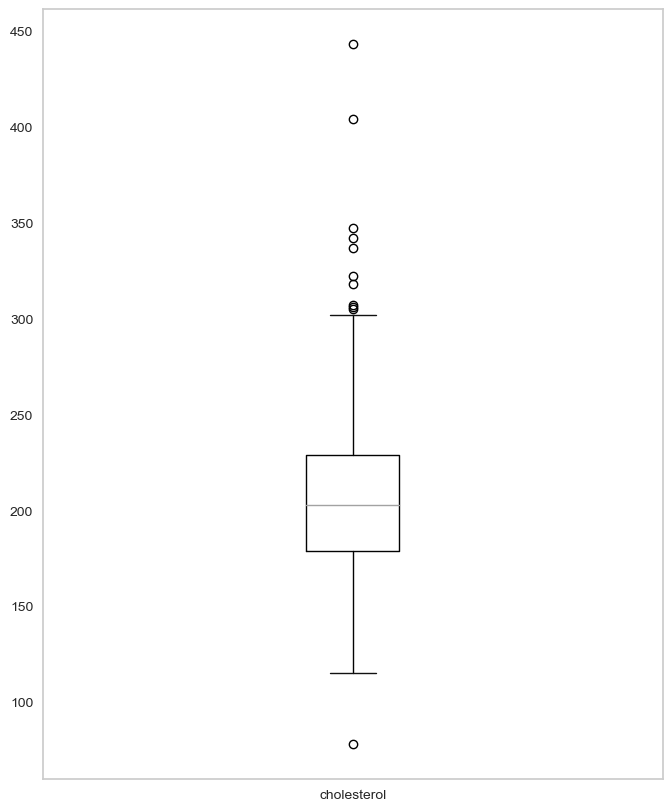

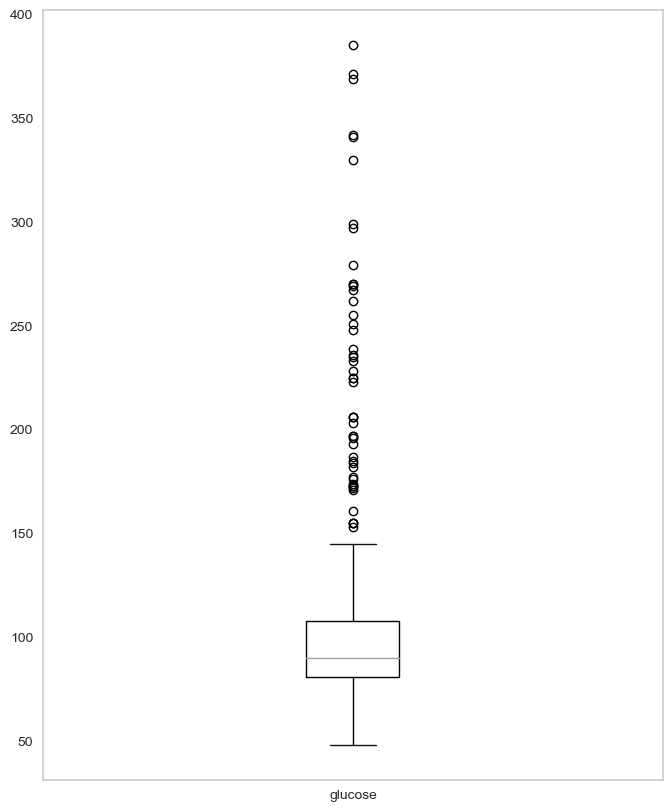

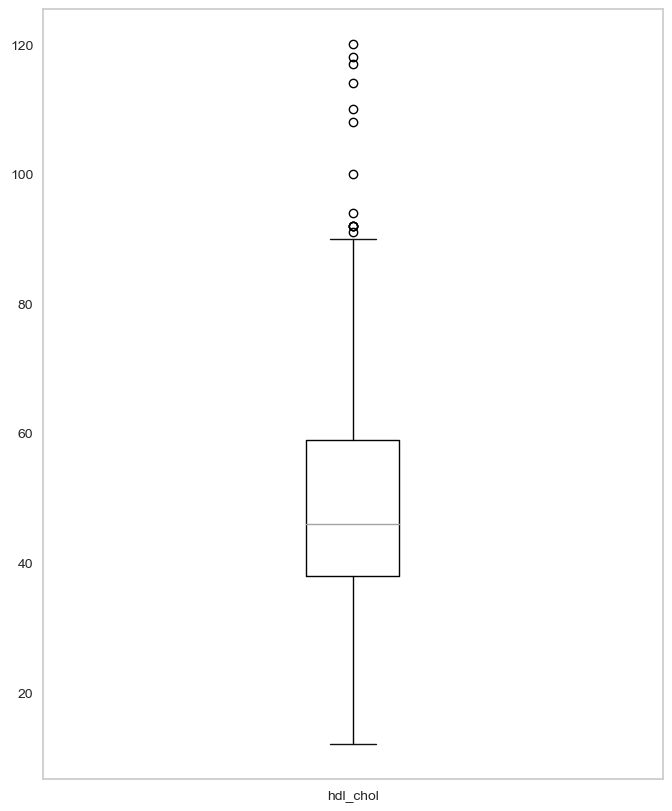

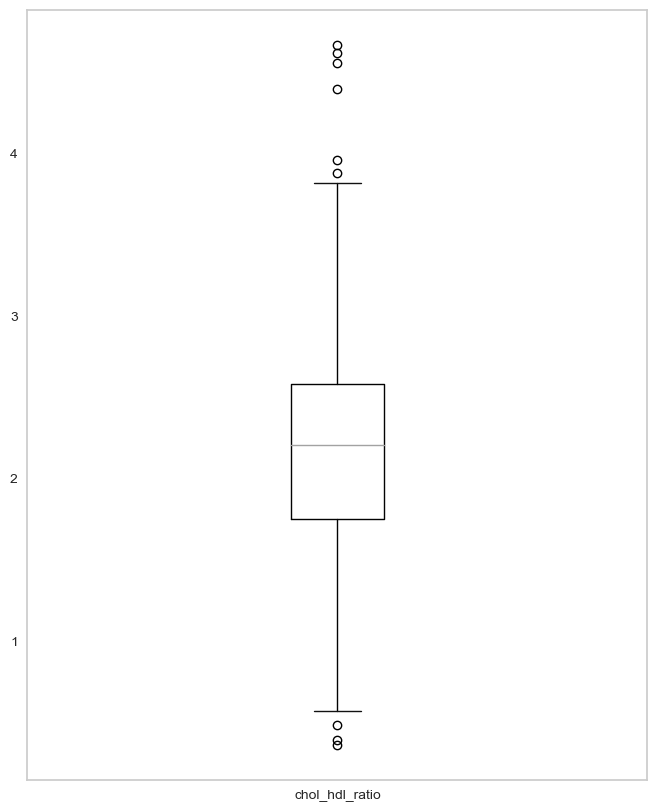

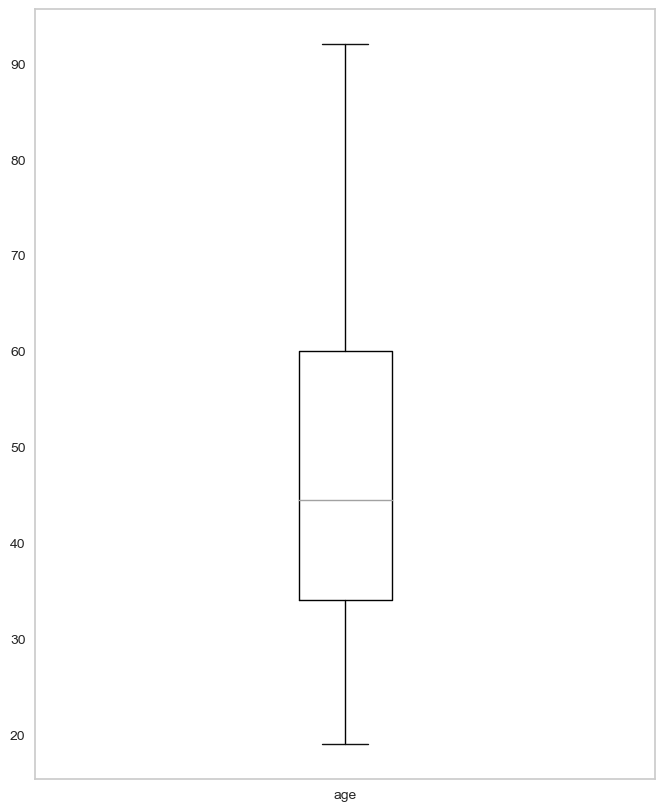

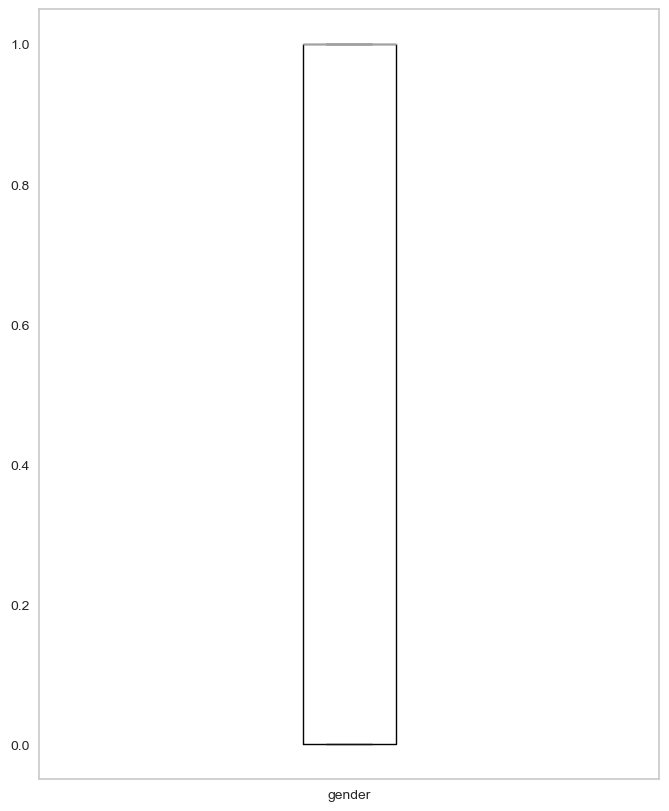

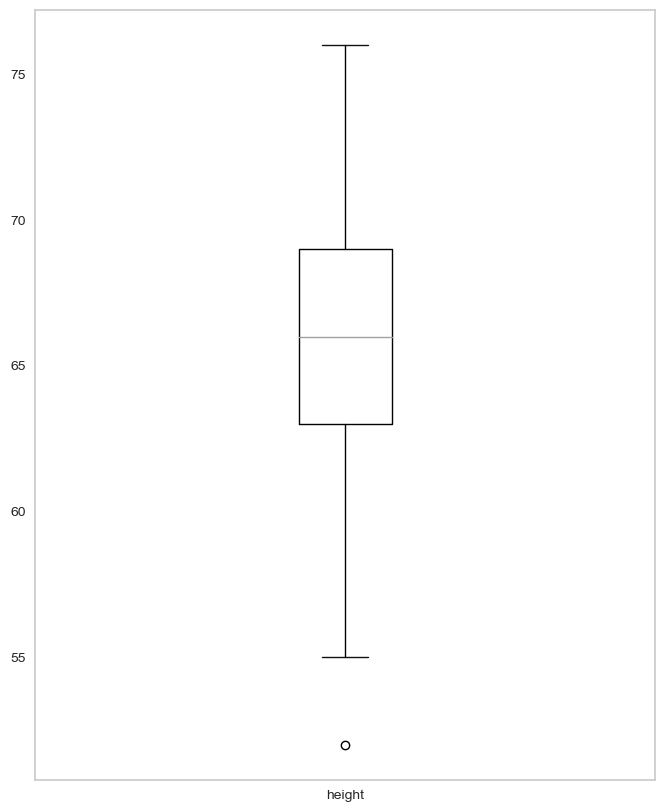

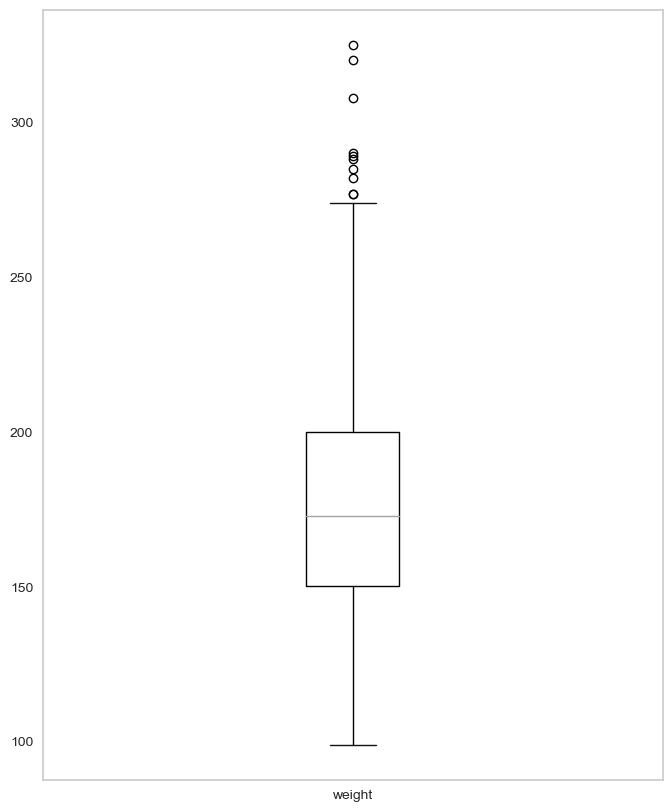

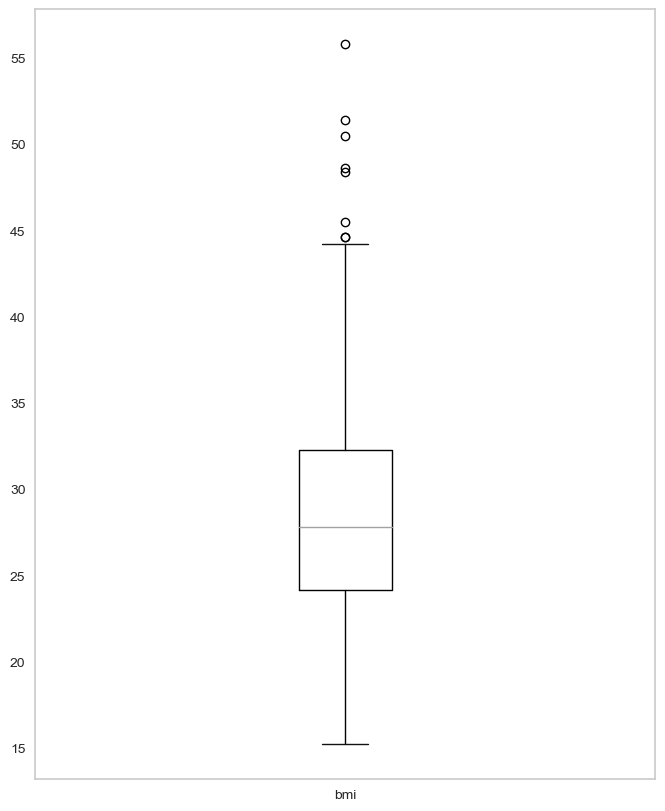

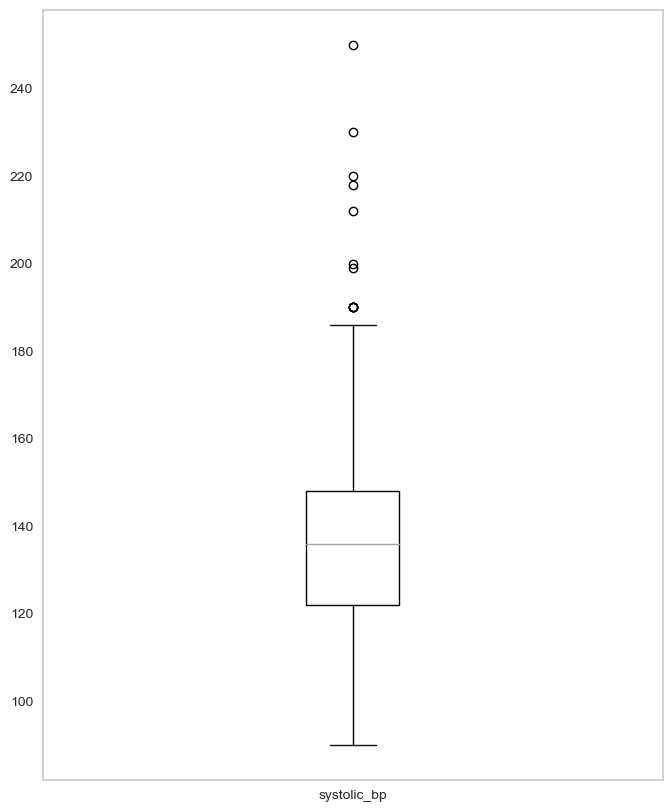

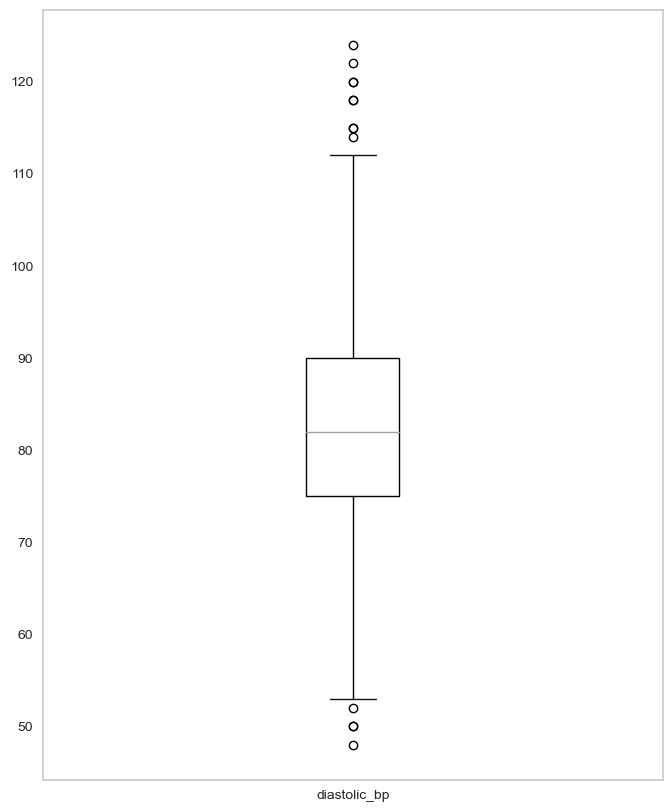

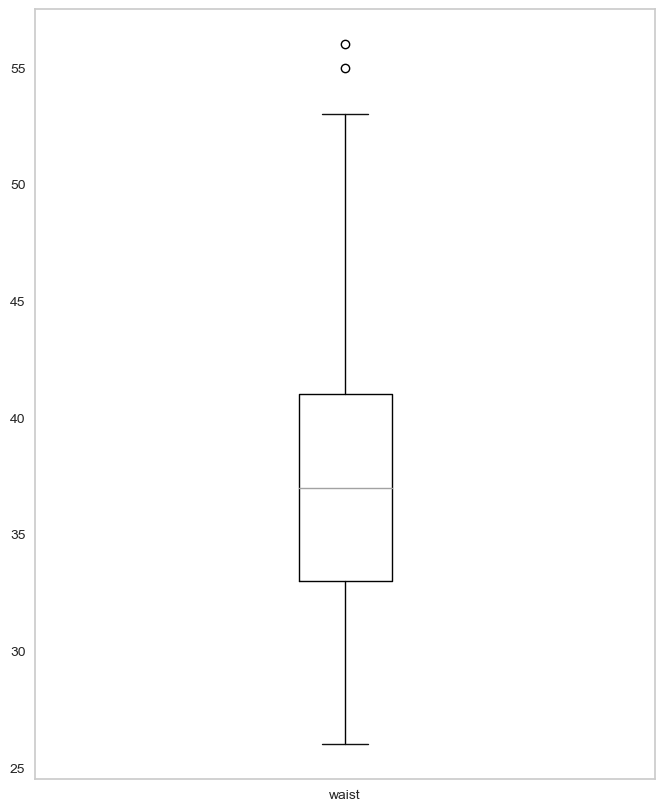

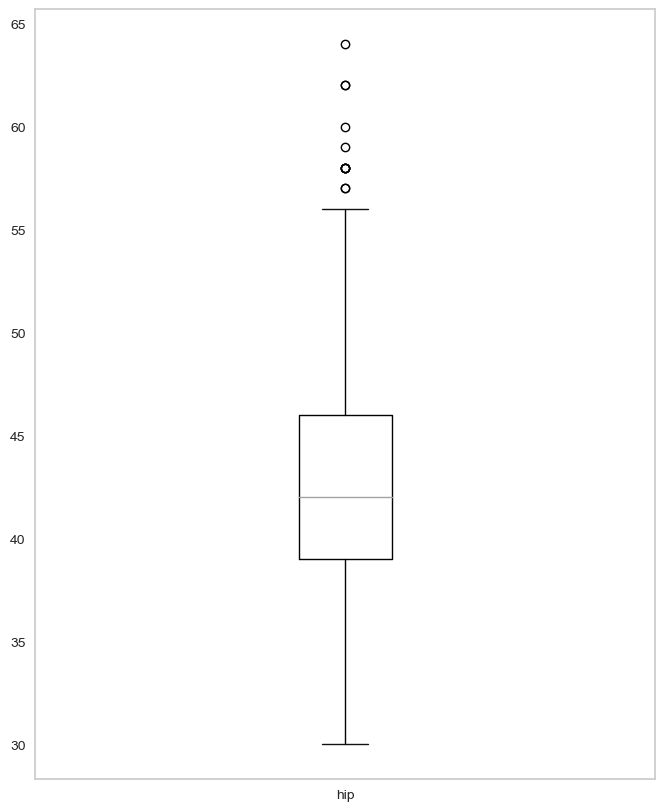

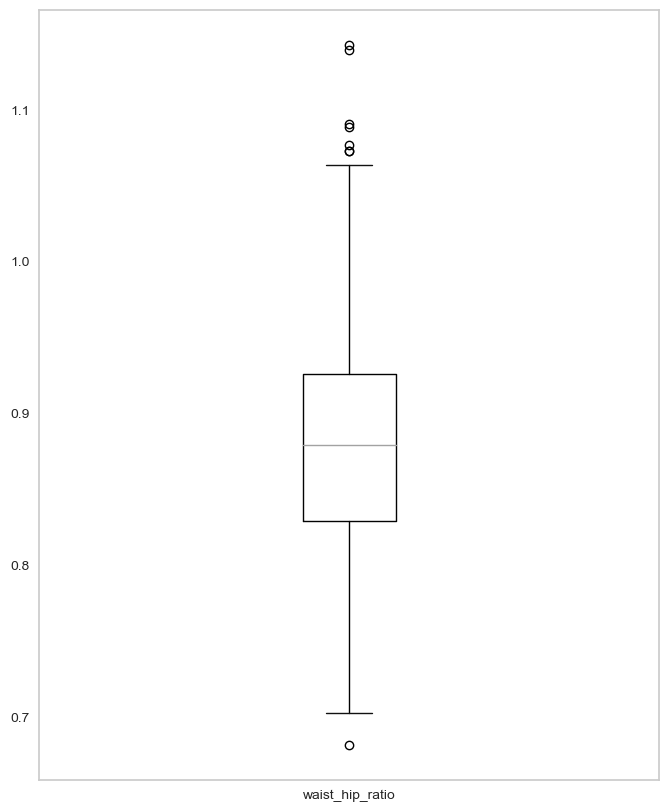

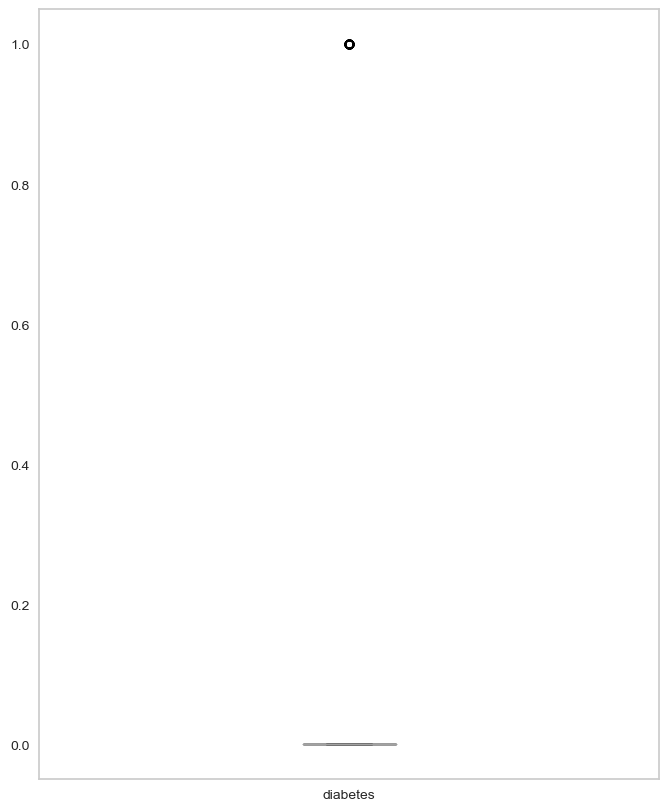

In [131]:
for feature in ['cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio',
       'diabetes']:
    plot_boxplot(df , feature)

In [92]:
# Define a function called "outliers" which returns a list of index of outliers
# IQR = Q3 - Q1
# +/- 1.5 X IQR

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound )]
    
    return ls

In [93]:
#Create an empty list to store the output indices from multiple columns
index_list = []
for feature in ['cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio',
       'diabetes']:
    index_list.extend(outliers(df, feature))

In [95]:
len(index_list)

209

In [96]:
# Define a function called "remove" which returns a cleaned dataframe without outliers
def remove (df , ls):
    ls = sorted((ls))
    df = df.drop(ls)

    return df

In [98]:
df_cleaned = remove(df, index_list)
df_cleaned.shape

(272, 15)

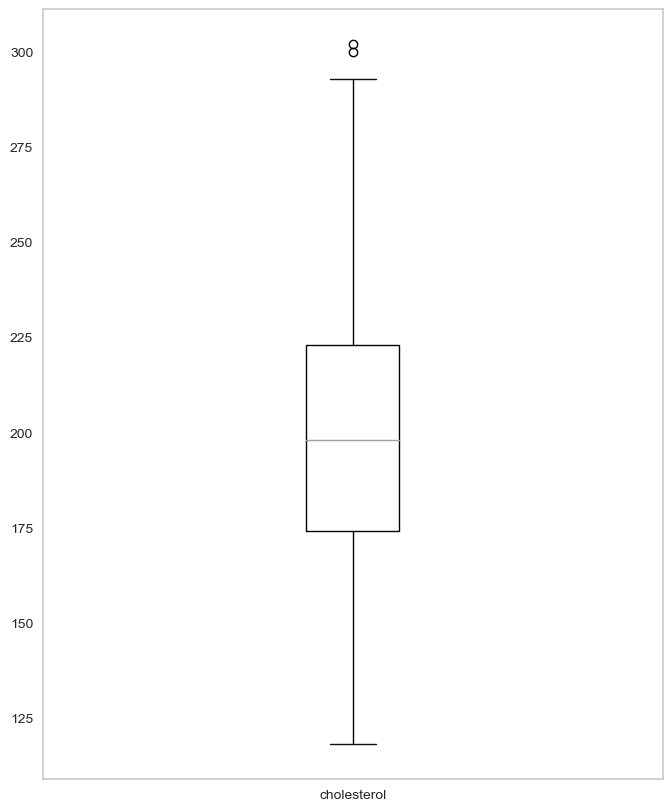

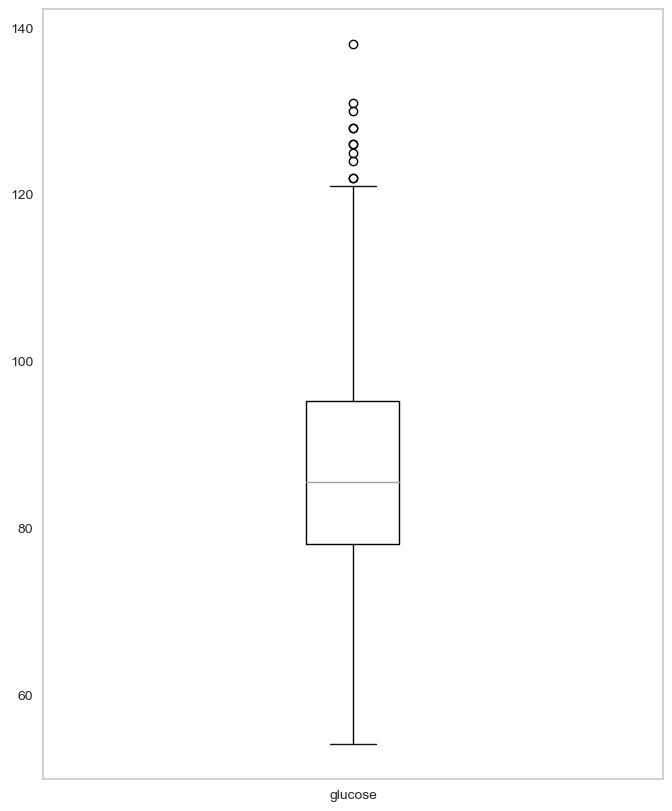

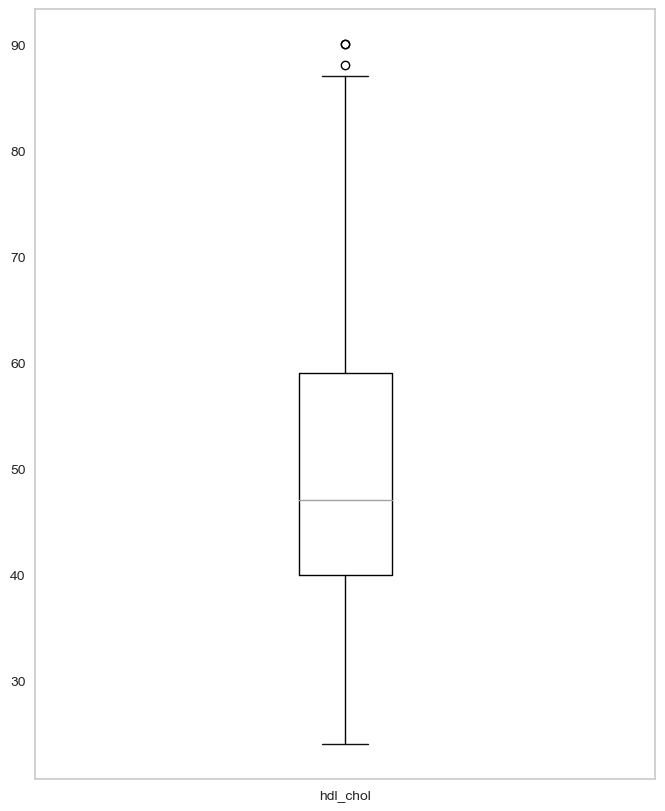

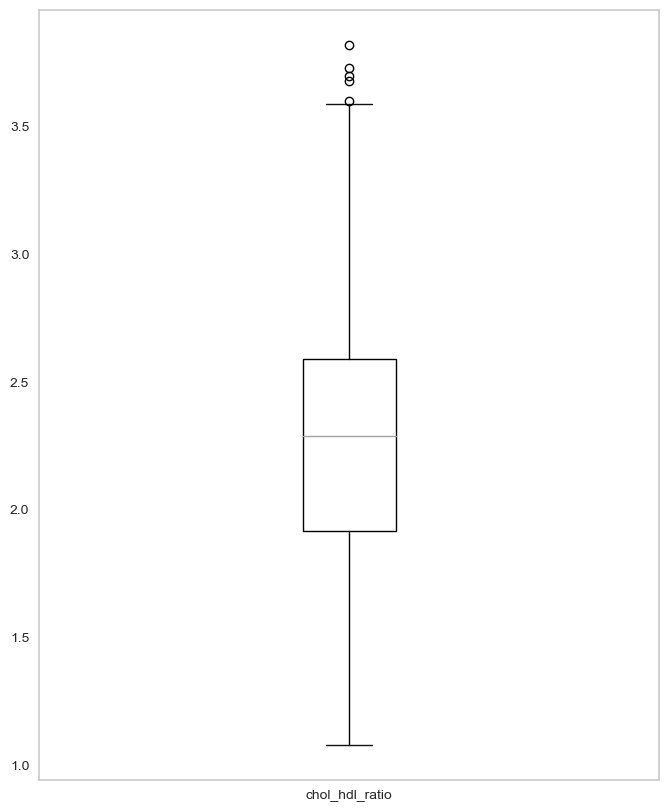

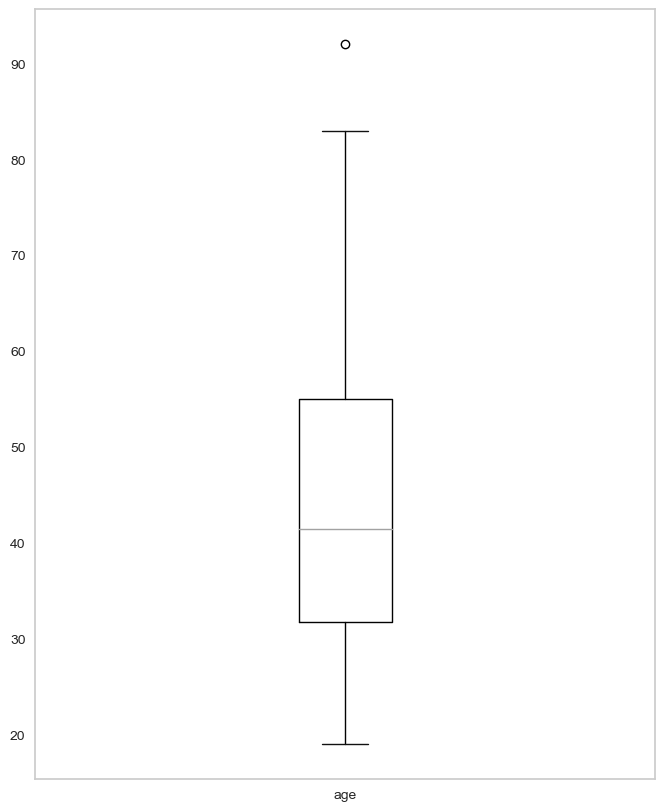

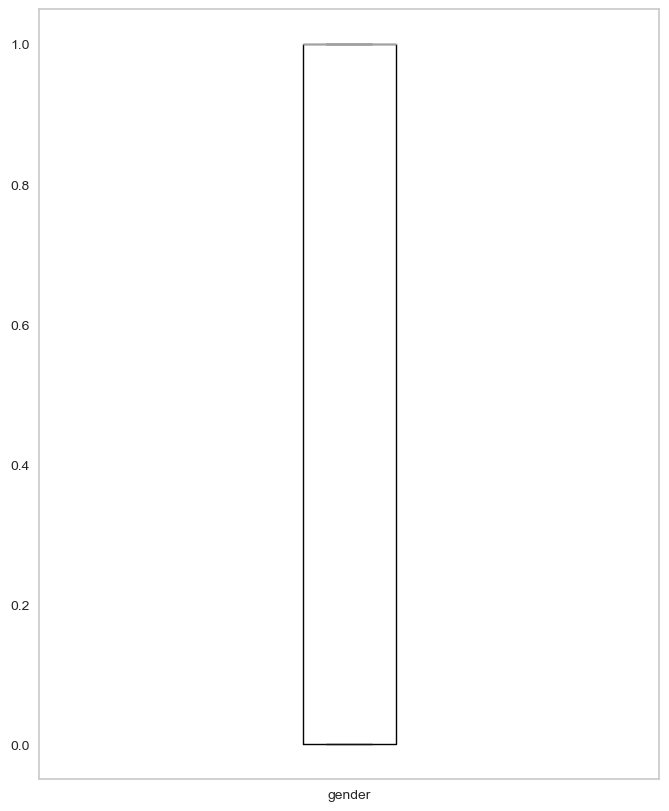

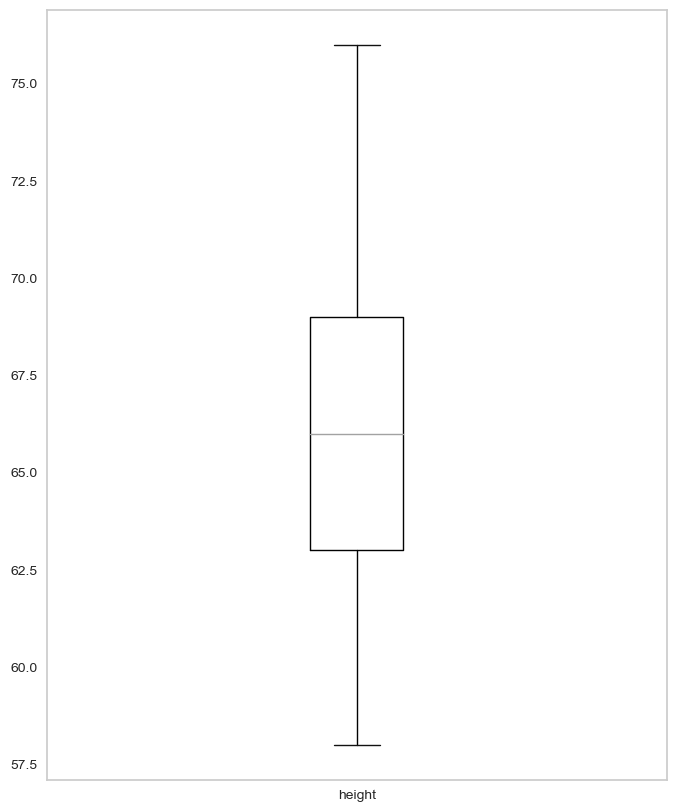

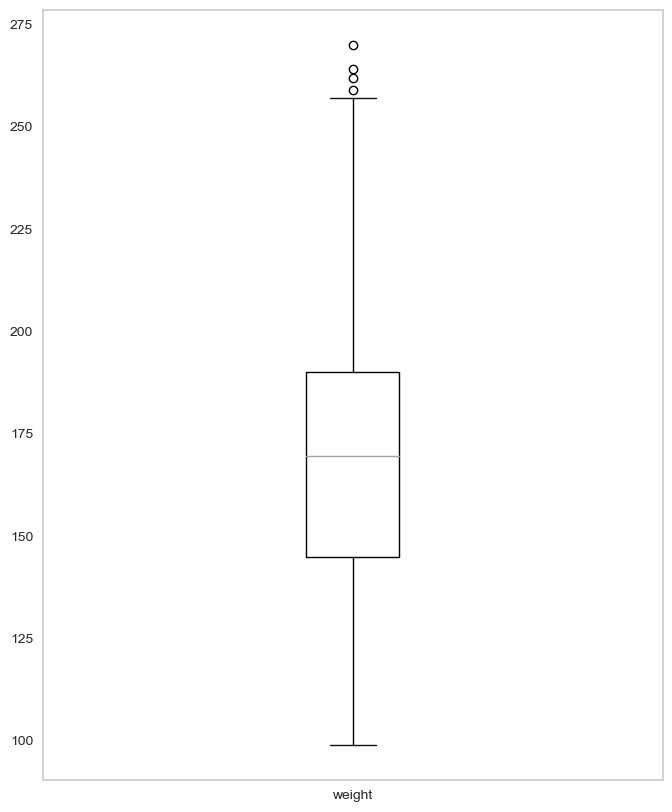

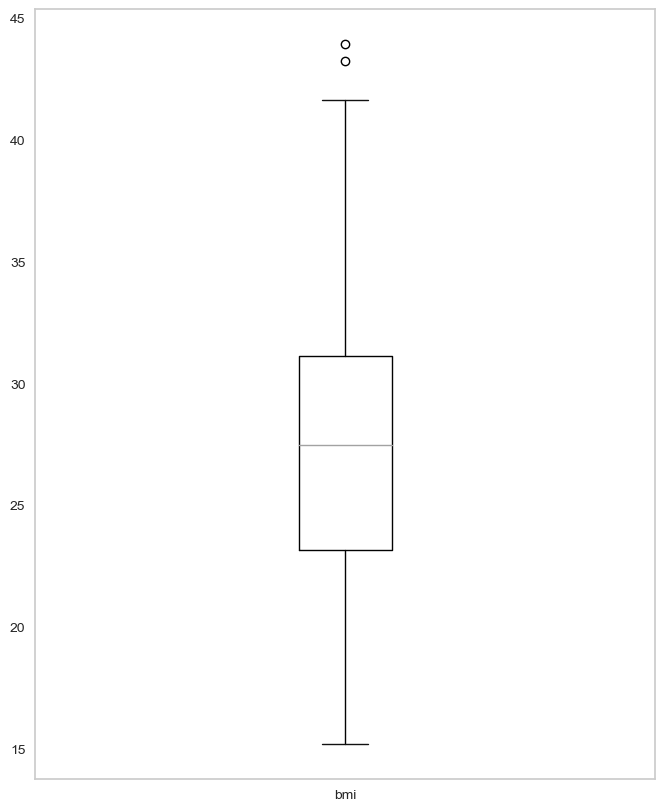

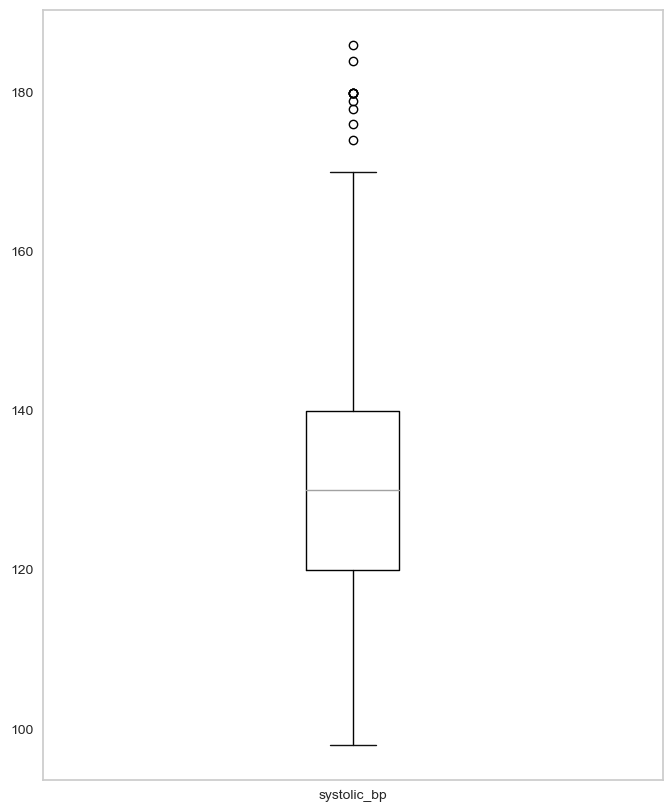

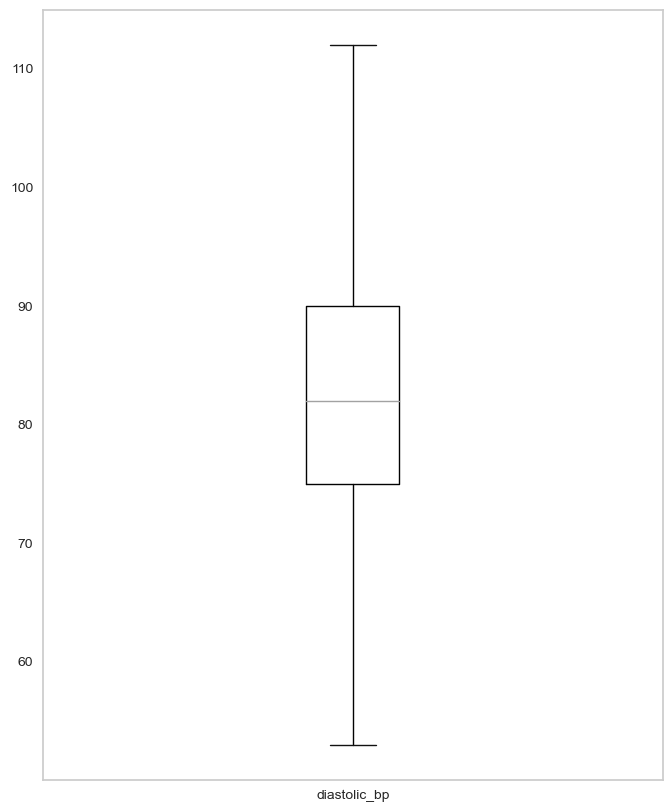

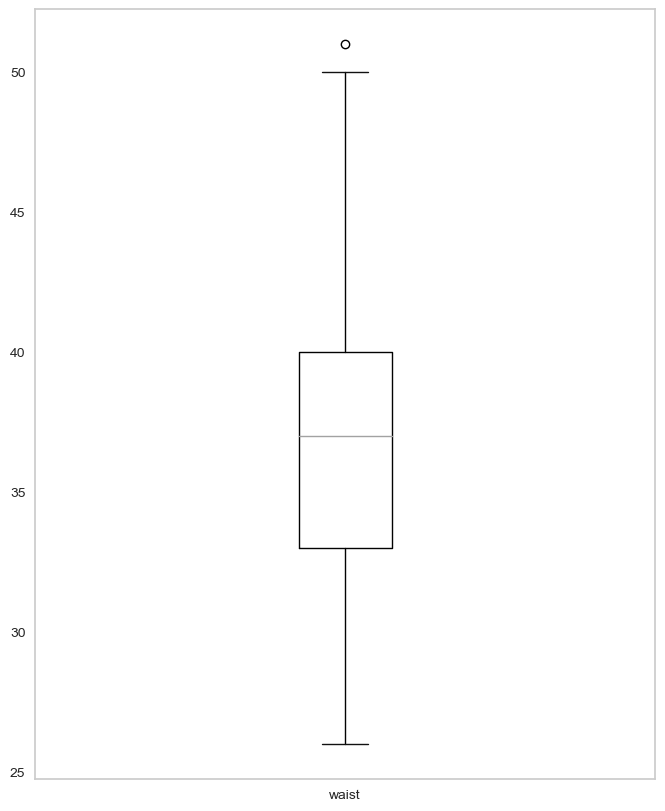

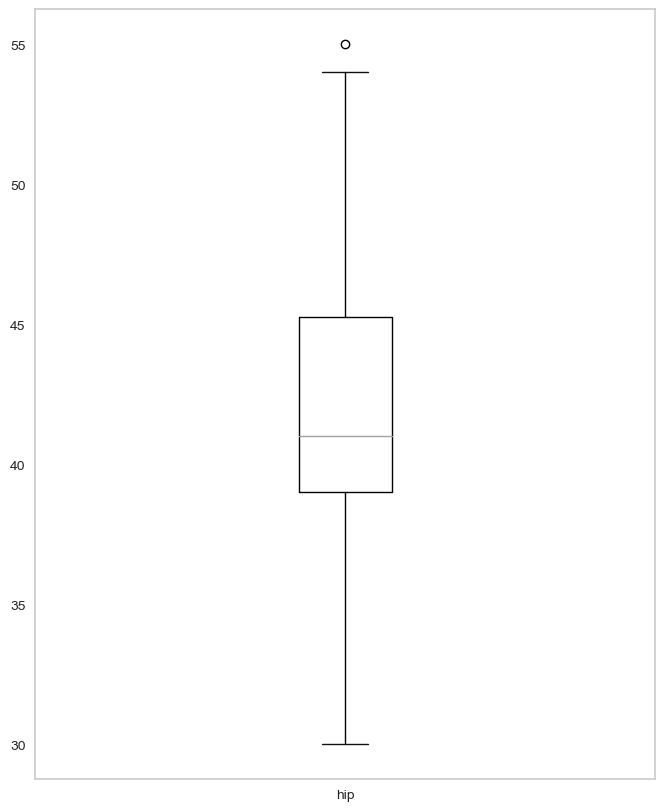

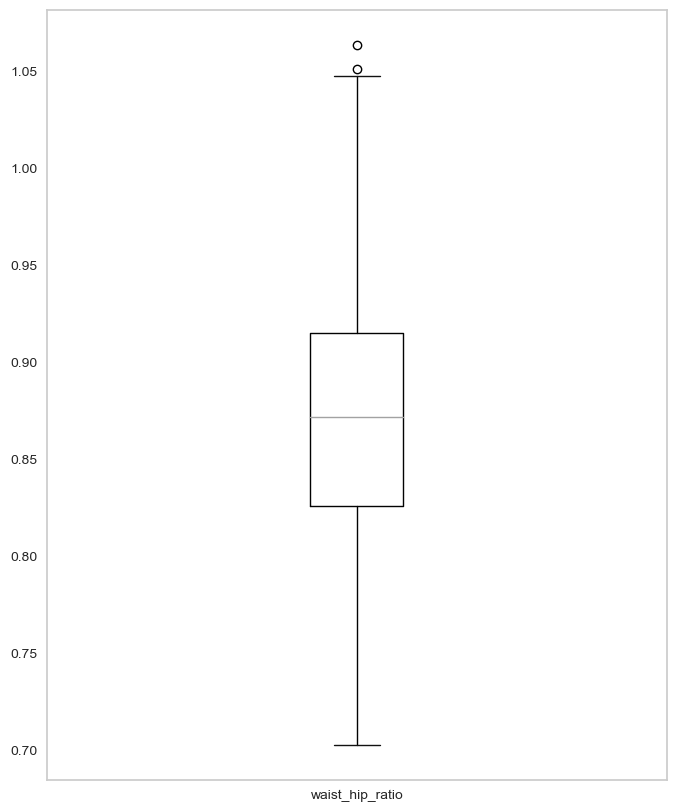

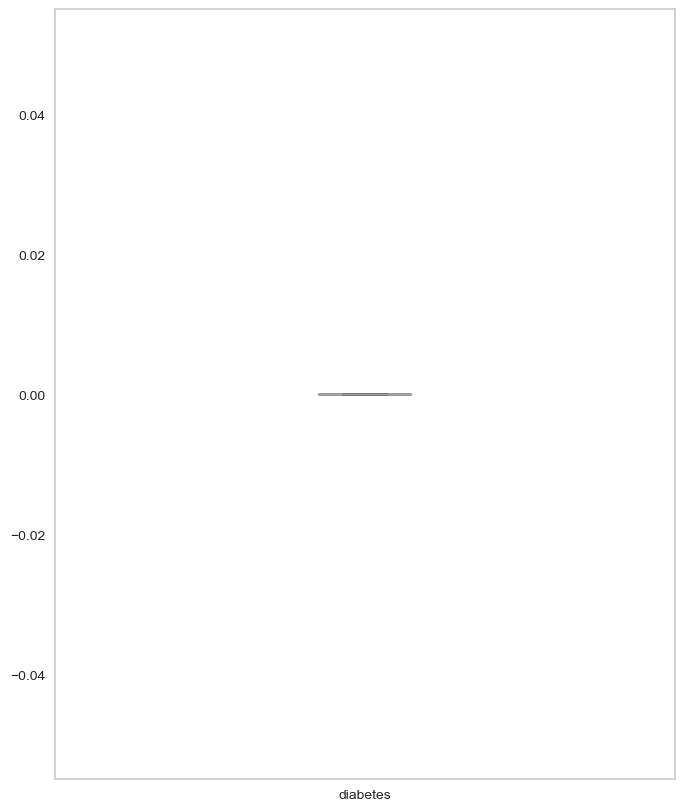

In [99]:
for feature in ['cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio',
       'diabetes']:
    plot_boxplot(df_cleaned , feature)

 ## feature set

In [100]:
df_cleaned.columns

Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender',
       'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist',
       'hip', 'waist_hip_ratio', 'diabetes'],
      dtype='object')

In [140]:
X = df[['cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio']]

In [141]:
y = df['diabetes']

# Feature Selection Method

# 1- Filter

### 1-1 Chi2

In [145]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func = chi2, k = 5)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['cholesterol', 'glucose', 'age', 'weight', 'systolic_bp'], dtype='object')

### 1-2 ANOVA F-value

In [144]:
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func = f_classif, k = 5)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['cholesterol', 'glucose', 'chol_hdl_ratio', 'age', 'waist'], dtype='object')

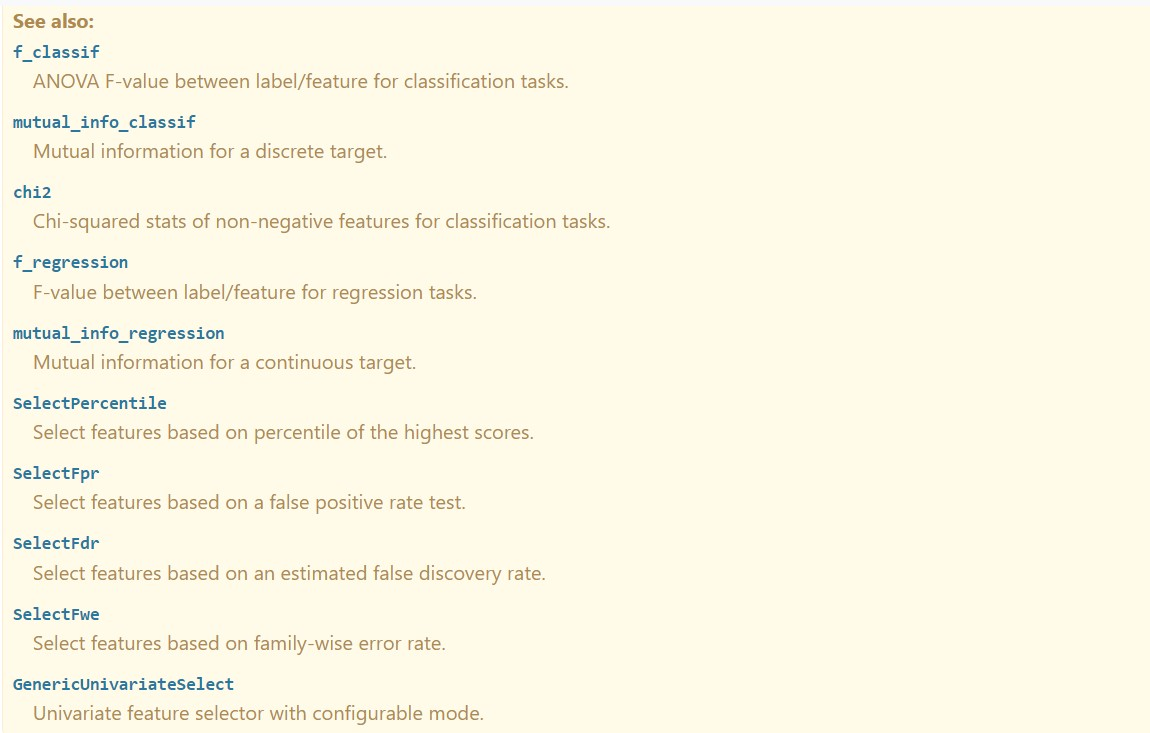

## 2- Wrapper

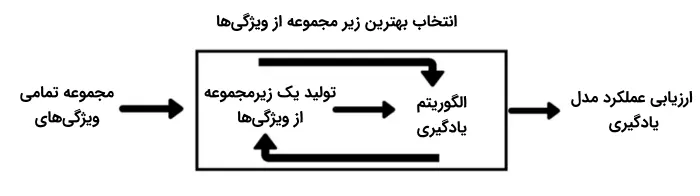

### 2-1 Forward Feature Selection

In [146]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [148]:
SFS_Forward = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = 4, direction ='forward')
SFS_Forward.fit(X, y)
X.columns[SFS_Forward.get_support()]

Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio'], dtype='object')

### 2-2 Backward Feature Selection

In [149]:
dtc=DecisionTreeClassifier()
SFS_Backward = SequentialFeatureSelector(estimator=dtc, n_features_to_select = 5, direction ='backward')
SFS_Backward.fit(X, y)
X.columns[SFS_Backward.get_support()]

Index(['glucose', 'hdl_chol', 'weight', 'bmi', 'hip'], dtype='object')

### 2-3 Recursive Feature Elimination (RFE)

In [150]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 5)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['cholesterol', 'glucose', 'chol_hdl_ratio', 'age', 'bmi'], dtype='object')

## 3- Embedding

In [151]:
from sklearn.linear_model import RidgeCV, LassoCV

In [152]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.071289
Best score using built-in LassoCV: 0.494885


In [153]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 8 variables


In [168]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Text(0.5, 1.0, 'Feature importance using Lasso Model')

In [155]:
imp_coef

hdl_chol          -0.000437
chol_hdl_ratio    -0.000000
gender             0.000000
height            -0.000000
bmi                0.000000
diastolic_bp      -0.000000
waist              0.000000
hip                0.000000
waist_hip_ratio    0.000000
weight             0.000231
systolic_bp        0.000590
cholesterol        0.000620
age                0.001495
glucose            0.004291
dtype: float64

## 4- Other method

### 4-1 rfecv

In [156]:
from sklearn.ensemble import RandomForestClassifier
# !pip install yellowbrick
from yellowbrick.model_selection import rfecv

In [157]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

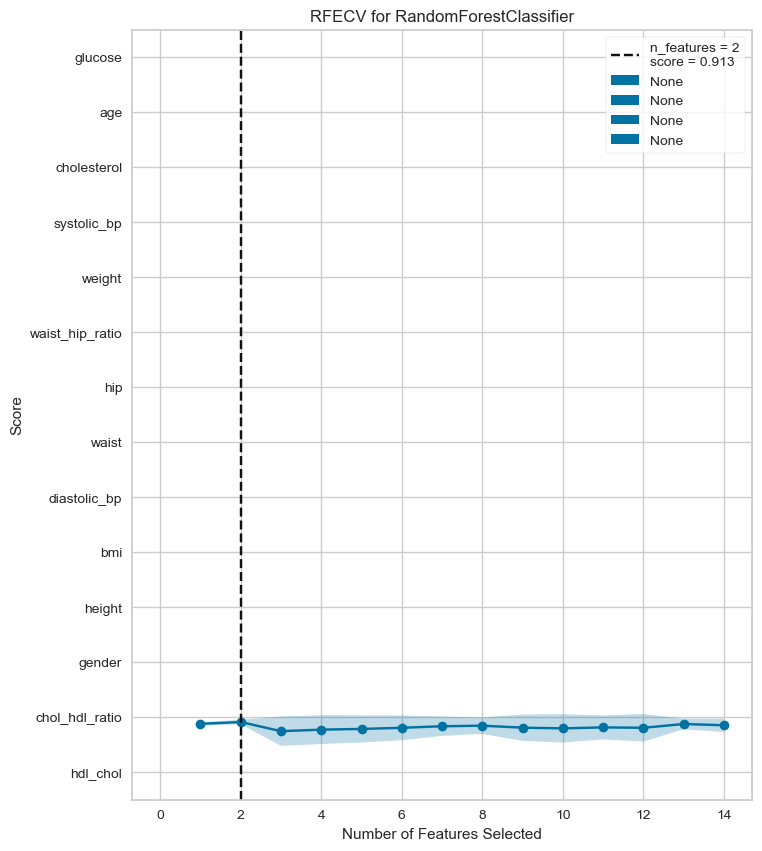

In [169]:
visualize = rfecv(RandomForestClassifier(), X=X, y=y, min_features_to_select = 5)

### 4-2 Correlation Matrix with Heatmap

In [172]:
import seaborn as sns

In [173]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

<AxesSubplot:>

### 4-3 Feature Importance

In [161]:
from sklearn.ensemble import ExtraTreesClassifier

In [162]:
model = ExtraTreesClassifier(n_estimators=5)
model.fit(X,y)
print(model.feature_importances_)

[0.0697375  0.27923902 0.04600607 0.15878683 0.08544678 0.01522206
 0.04517568 0.04394825 0.04746619 0.05070079 0.02496131 0.0433374
 0.04744211 0.04253   ]


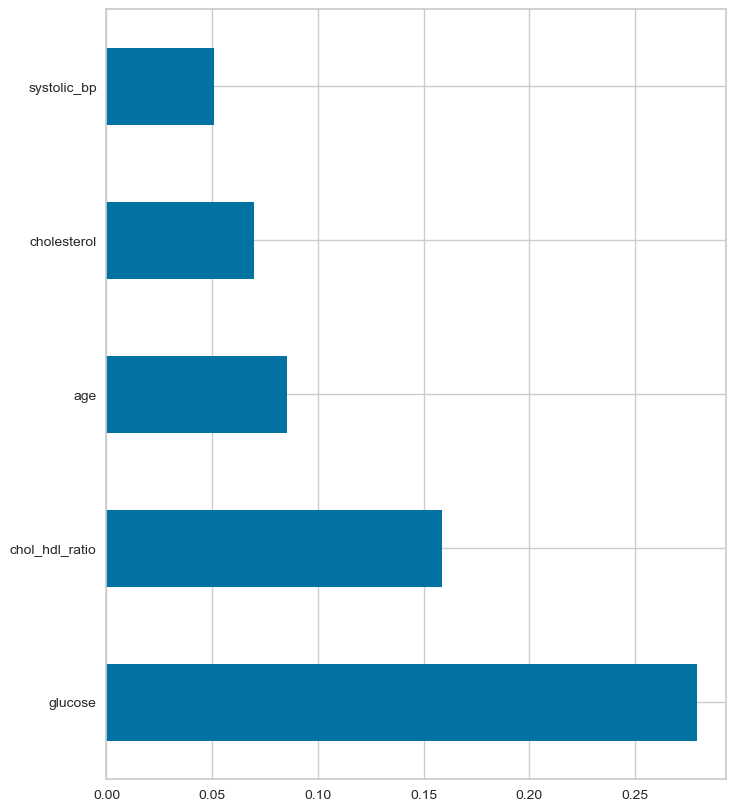

In [164]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# End of The Code